DataCamp based on these criteria to assess my data skill at the time conducting this case study
https://www.datacamp.com/certificate/DA0019621540864

# DATA ANALYST CASE STUDY 
## TRAVEL ASSURED - TRAVEL INSURANCE COMPANY
### BUSINESS SITUATION
Due to the COVID pandemic, they have had to cut their marketing budget by over 50%. It is more important than ever that **they advertise in the right places and to the right people**
Your presentation should be no longer than **ten minutes**. It should include **no more than eight slides of content**. You will be presenting to the CEO.
### WHAT THEY WANT TO KNOW 
* Are there differences in the travel habits between customers and non-customers 
* They believe they are more likely to travel often (buying tickets from frequent flyer miles) and travel abroad
* How my findings could help their marketing strategy

### INFORMATION SCHEMA (FEATURES DETAILS)

![FEATURES DETAILS](image/schema.png)

### IMPORTING ESSENTIAL RESOURCES


In [105]:

import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

customers = pd.read_csv('data/travel_insurance.csv')

### EXPLORATORY ANALYSIS
- Right now our company has 1987 customers
- Customers has average age of 30 years, (youngest: 25, oldest: 35)
- They all have a family whose size is 5 people (mininum: 2 people, maximum: 9 people)
- Frequent flyer: 20%, 


### FINDINGS
- Customers who are frequent flyer have 57% to buy travel insurance compared to 30% of customers who aren't
- Customers who have travelled abroad are three times (78%) more likely to get travel insurance than those who have not (25%)
- There is a strong correlation between Annual Income and Travel Insurance
  - Especially, people who have annual income greater than 1.2 million has more than 70% chance of getting a travel insurance
- Customers whose employment type belong to private sector/self-employed has 40% to get travel insurance, which is quite low chance, less desirable option compared to other group of customers 
- At some ages (25, >=30): people are more likely to buy travel insurance 

#### RECOMMENDATIONS
Focus on customers who has following characteristics to minimize marketing cost and maximize effciency of marketing strategy:
- Cu
- Frequent flyer
- Have traveled abroad
- High income (>=1.2M)
- Aggressive promotion for customers who are 25, >30 years old

In [106]:
customers['FrequentFlyer'] = [1 if isFrequent == "Yes" else 0 for isFrequent in customers.FrequentFlyer]
customers['EverTravelledAbroad'] = [1 if haveEverTravelledAbroad == "Yes" else 0 for haveEverTravelledAbroad in customers.EverTravelledAbroad]
customers['GraduateOrNot'] = [1 if isGraduate == "Yes" else 0 for isGraduate in customers.GraduateOrNot]
# [x if x != "banana" else "orange" for x in fruits]
customers.head(5)




,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,1,400000,6,1,0,0,0
1,31,Private Sector/Self Employed,1,1250000,7,0,0,0,0
2,34,Private Sector/Self Employed,1,500000,4,1,0,0,1
3,28,Private Sector/Self Employed,1,700000,3,1,0,0,0
4,28,Private Sector/Self Employed,1,700000,8,1,1,0,0


In [107]:
customers.describe()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,29.650226,0.851535,9.327630e+05,4.752894,0.277806,0.209864,0.191243,0.357323
std,2.913308,0.355650,3.768557e+05,1.609650,0.448030,0.407314,0.393379,0.479332
min,25.000000,0.000000,3.000000e+05,2.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.000000,6.000000e+05,4.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,1.000000,9.000000e+05,5.000000,0.000000,0.000000,0.000000,0.000000
75%,32.000000,1.000000,1.250000e+06,6.000000,1.000000,0.000000,0.000000,1.000000
max,35.000000,1.000000,1.800000e+06,9.000000,1.000000,1.000000,1.000000,1.000000


In [108]:
customers.corr()

,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Age,1.000000,0.027125,-0.020101,0.027409,0.007359,-0.033159,-0.012779,0.061060
GraduateOrNot,0.027125,1.000000,0.108066,0.021201,0.018811,-0.028120,0.062683,0.018934
AnnualIncome,-0.020101,0.108066,1.000000,-0.015367,-0.001149,0.353087,0.486043,0.396763
FamilyMembers,0.027409,0.021201,-0.015367,1.000000,0.028209,-0.023775,-0.020755,0.079909
ChronicDiseases,0.007359,0.018811,-0.001149,0.028209,1.000000,-0.043720,0.021238,0.018190
FrequentFlyer,-0.033159,-0.028120,0.353087,-0.023775,-0.043720,1.000000,0.277334,0.232103
EverTravelledAbroad,-0.012779,0.062683,0.486043,-0.020755,0.021238,0.277334,1.000000,0.433183
TravelInsurance,0.061060,0.018934,0.396763,0.079909,0.018190,0.232103,0.433183,1.000000


#### FINDINGS 1
Customers who are frequent flyer have 57 percent to buy travel insurance compared to 30 percent of customers who aren't

In [109]:
flyer_insurance = customers.groupby('FrequentFlyer')['TravelInsurance'].mean()
# print(flyer_insurance)
# print(pd.crosstab(customers.TravelInsurance, customers.FrequentFlyer, margins=True))
print(pd.crosstab(customers.TravelInsurance, customers.FrequentFlyer, normalize=1, margins=True))


FrequentFlyer      0         1       All
TravelInsurance                         
0                0.7  0.426859  0.642677
1                0.3  0.573141  0.357323


#### FINDINGS 2
Customers who have travelled abroad are three times (78%) more likely to get travel insurance than those who have not (25%).

In [110]:
print(customers.groupby('EverTravelledAbroad')['TravelInsurance'].mean())
# pd.crosstab(customers.EverTravelledAbroad, customers.TravelInsurance)
print(pd.crosstab(customers.TravelInsurance, customers.EverTravelledAbroad, normalize=1, margins=True))



EverTravelledAbroad
0    0.256378
1    0.784211
Name: TravelInsurance, dtype: float64
EverTravelledAbroad         0         1       All
TravelInsurance                                  
0                    0.743622  0.215789  0.642677
1                    0.256378  0.784211  0.357323


### Findings 3
* There is a strong correlation between Annual Income and Travel Insurance
* Especially, people who have annual income greater than 1.2 million has more than 70 percent chance of getting a travel insurance

In [111]:
more_1_2_million = customers.AnnualIncome > 1200000
n_people_more_1_2_million = sum(more_1_2_million)
n_people_less_1_2_million = customers.shape[0] - n_people_more_1_2_million
print(
  """People who have
  Annual income more than 1.2M: {}, has {} chances get travel insurance
  Annual income less than 1.2M: {}, has {} chances get travel insurance
      """.format(n_people_more_1_2_million, round(customers[more_1_2_million]['TravelInsurance'].mean(),2),
                 n_people_less_1_2_million, round(customers[~more_1_2_million]['TravelInsurance'].mean(),2)))


People who have
  Annual income more than 1.2M: 511, has 0.72 chances get travel insurance
  Annual income less than 1.2M: 1476, has 0.23 chances get travel insurance
      


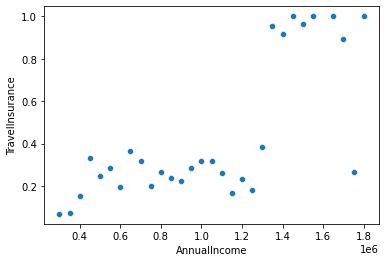

In [112]:
# sns.histplot(data = customers, x= 'AnnualIncome')
income_insurance = customers.groupby('AnnualIncome')['TravelInsurance'].mean()
fig, axes = plt.subplots(1, 1)
# axes.plot(income_insurance)
axes = sns.scatterplot(data =income_insurance)
plt.show()


### Findings 4
* Customers whose employment type belong to private sector/self-employed has 40 percent to get travel insurance, which is quite low chance, less desirable option compared to other group of customers 

In [113]:
print(customers.groupby('Employment Type')['TravelInsurance'].count())
customers.groupby('Employment Type').mean()

Employment Type
Government Sector                570
Private Sector/Self Employed    1417
Name: TravelInsurance, dtype: int64


,Age,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
Employment Type,,,,,,,,
Government Sector,30.178947,0.922807,7.253509e+05,4.761404,0.285965,0.117544,0.078947,0.245614
Private Sector/Self Employed,29.437544,0.822865,1.016196e+06,4.749471,0.274524,0.247001,0.236415,0.402258


### FINDINGS 5
- At some age (25, >=30): people are more likely to buy travel insurance 

In [114]:
pd.crosstab(customers.TravelInsurance, customers.Age, normalize=1, margins=True)


Age,25,26,27,28,29,30,31,32,33,34,35,All
TravelInsurance,,,,,,,,,,,,
0,0.369863,0.5,0.793893,0.79249,0.734375,0.569231,0.679487,0.791209,0.472973,0.5,0.533333,0.642677
1,0.630137,0.5,0.206107,0.20751,0.265625,0.430769,0.320513,0.208791,0.527027,0.5,0.466667,0.357323
